In [128]:
import sys
!{sys.executable} -m pip install geopandas

In [129]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.interpolate import interp1d
import seaborn.objects as so
from scipy.stats import chi2_contingency
import geopandas as gpd

In [130]:
cancellations_hb_fp = os.path.join(os.getcwd(), "datasets", "cancellations_by_hb.csv")
cancellations_hb = pd.read_csv(cancellations_hb_fp)

population_fp = os.path.join(os.getcwd(), "datasets", "healthboard_population2021.csv")
population = pd.read_csv(population_fp)

hb_names_fp = os.path.join(os.getcwd(), "datasets", "hb_names.xlsx")
hb_names = pd.read_excel(hb_names_fp)

cancellations_hb['Year'] = cancellations_hb['Month'].astype(str).str[:4].astype(int)
cancellations_hb

#health_board_boundaries_fp = os.path.join(os.getcwd(), "datasets", "SG_NHS_HealthBoards_2019.shp")
#health_board_boundaries = gpd.read_file(health_board_boundaries_fp)

,_id,Month,HBT,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,Year
0,1,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN,2015
1,2,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN,2015
2,3,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN,2015
3,4,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN,2015
4,5,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,1571,202401,S08000029,1334,NaN,64,NaN,21,NaN,27,NaN,16,NaN,0,NaN,2024
1571,1572,202401,S08000030,1550,NaN,131,NaN,46,NaN,47,NaN,5,NaN,33,NaN,2024
1572,1573,202401,S08000031,5121,NaN,452,NaN,135,NaN,144,NaN,120,NaN,53,NaN,2024
1573,1574,202401,S08000032,1930,NaN,167,NaN,93,NaN,43,NaN,27,NaN,4,NaN,2024


In [131]:

relevantcancel = cancellations_hb[["HBT","TotalCancelled"]]

In [132]:
relevantcancel = relevantcancel.groupby("HBT").sum()
relevantcancel.rename(columns={"HBT":"Health Board Code"},inplace=True)
hb_names.rename(columns={"HB21CD":"HBT","HB21NM":"HBNames"},inplace=True)
hb_names

,HBT,HB21CDS,HBNames
0,S08000015,SA9,Ayrshire and Arran
1,S08000016,SB9,Borders
2,S08000017,SY9,Dumfries and Galloway
3,S08000019,SV9,Forth Valley
4,S08000020,SN9,Grampian
5,S08000022,SH9,Highland
6,S08000024,SS9,Lothian
7,S08000025,SR9,Orkney
8,S08000026,SZ9,Shetland
9,S08000028,SW9,Western Isles


In [133]:
merged_names = pd.merge(relevantcancel, hb_names, on = "HBT")
merged_names


,HBT,TotalCancelled,HB21CDS,HBNames
0,S08000015,15721,SA9,Ayrshire and Arran
1,S08000016,3477,SB9,Borders
2,S08000017,12470,SY9,Dumfries and Galloway
3,S08000019,9021,SV9,Forth Valley
4,S08000020,24103,SN9,Grampian
5,S08000022,13865,SH9,Highland
6,S08000024,48812,SS9,Lothian
7,S08000025,1976,SR9,Orkney
8,S08000026,1119,SZ9,Shetland
9,S08000028,922,SW9,Western Isles


In [134]:
names = merged_names[["HBNames","TotalCancelled"]] 
names.reset_index(drop=True, inplace=True)
names

,HBNames,TotalCancelled
0,Ayrshire and Arran,15721
1,Borders,3477
2,Dumfries and Galloway,12470
3,Forth Valley,9021
4,Grampian,24103
5,Highland,13865
6,Lothian,48812
7,Orkney,1976
8,Shetland,1119
9,Western Isles,922


In [135]:
relevantcancel

,TotalCancelled
HBT,
S08000015,15721
S08000016,3477
S08000017,12470
S08000019,9021
S08000020,24103
S08000022,13865
S08000024,48812
S08000025,1976
S08000026,1119


In [136]:
def get_initials(name):
    initials = ''.join(word[0].upper() for word in name.split())
    return initials
names['Initials'] = names['HBNames'].apply(get_initials)
names

/tmp/ipykernel_140/2193724132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names['Initials'] = names['HBNames'].apply(get_initials)


,HBNames,TotalCancelled,Initials
0,Ayrshire and Arran,15721,AAA
1,Borders,3477,B
2,Dumfries and Galloway,12470,DAG
3,Forth Valley,9021,FV
4,Grampian,24103,G
5,Highland,13865,H
6,Lothian,48812,L
7,Orkney,1976,O
8,Shetland,1119,S
9,Western Isles,922,WI


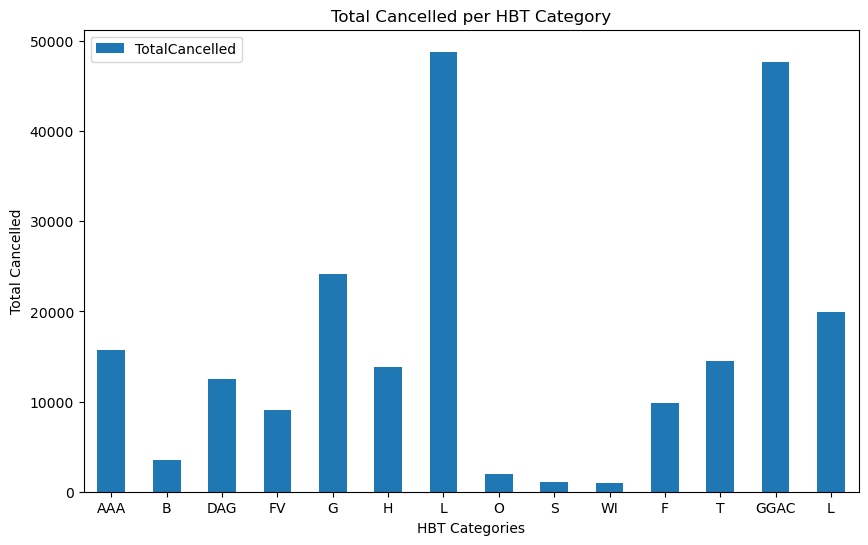

In [137]:
names.plot(x = "Initials", y = "TotalCancelled",kind = "bar", figsize = (10,6))

# Adding title and labels
plt.title('Total Cancelled per HBT Category')
plt.xlabel('HBT Categories')
plt.ylabel('Total Cancelled')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=0)

# Showing the plot
plt.show()

#shows Lanarkshire has the highest amount of cancellations

In [138]:
names[["HBNames","Initials"]]

,HBNames,Initials
0,Ayrshire and Arran,AAA
1,Borders,B
2,Dumfries and Galloway,DAG
3,Forth Valley,FV
4,Grampian,G
5,Highland,H
6,Lothian,L
7,Orkney,O
8,Shetland,S
9,Western Isles,WI


In [139]:
#now compare between population and number of cancellations
population


,_id,Year,HB,HBQF,Sex,SexQF,AllAges,Age0,Age1,Age2,...,Age81,Age82,Age83,Age84,Age85,Age86,Age87,Age88,Age89,Age90plus
0,1,1981,S92000003,d,All,d,5180200,68529,66723,64065,...,19381,15848,13647,11778,10157,8229,6795,5579,4339,13571
1,2,1981,S92000003,d,Female,NaN,2685340,33266,32581,30995,...,13650,11349,10014,8759,7686,6187,5156,4329,3371,10859
2,3,1981,S92000003,d,Male,NaN,2494860,35263,34142,33070,...,5731,4499,3633,3019,2471,2042,1639,1250,968,2712
3,4,1981,S08000015,NaN,All,d,377854,5036,4863,4764,...,1334,1084,1000,807,693,539,432,378,276,821
4,5,1981,S08000015,NaN,Female,NaN,196774,2446,2378,2264,...,928,774,746,597,496,401,304,297,213,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1841,2021,S08000031,NaN,Female,NaN,607878,5062,5350,5707,...,3426,3370,3096,2903,2622,2455,2206,1877,1706,6428
1841,1842,2021,S08000031,NaN,Male,NaN,577162,5380,5645,5904,...,2232,2199,1995,1849,1547,1385,1099,948,844,2673
1842,1843,2021,S08000032,NaN,All,d,664030,6232,6402,6770,...,3501,3325,3129,2724,2547,2106,1772,1599,1299,4398
1843,1844,2021,S08000032,NaN,Female,NaN,342339,3020,3142,3340,...,2045,1962,1806,1687,1583,1359,1122,986,837,3063


In [140]:
population.rename(columns={"HB":"HBT"},inplace=True)
relpop = population[["HBT","AllAges","Year"]]
relpop


,HBT,AllAges,Year
0,S92000003,5180200,1981
1,S92000003,2685340,1981
2,S92000003,2494860,1981
3,S08000015,377854,1981
4,S08000015,196774,1981
...,...,...,...
1840,S08000031,607878,2021
1841,S08000031,577162,2021
1842,S08000032,664030,2021
1843,S08000032,342339,2021


In [141]:
filterelpop = relpop[(relpop['Year'] >= 2015) & (relpop['Year'] <= 2021)]
filterelpop
filterelpop = filterelpop.groupby(["HBT","Year"]).sum()
filterelpop

AllAges
HBT       Year          
S08000015 2015    741180
          2016    741120
          2017    740820
          2018    739340
          2019    738720
...                  ...
S92000003 2017  10849600
          2018  10876200
          2019  10926600
          2020  10932000
          2021  10959800

[105 rows x 1 columns]

In [142]:
filterelpop

AllAges
HBT       Year          
S08000015 2015    741180
          2016    741120
          2017    740820
          2018    739340
          2019    738720
...                  ...
S92000003 2017  10849600
          2018  10876200
          2019  10926600
          2020  10932000
          2021  10959800

[105 rows x 1 columns]

In [143]:
cancellations_hb

,_id,Month,HBT,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,Year
0,1,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN,2015
1,2,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN,2015
2,3,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN,2015
3,4,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN,2015
4,5,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,1571,202401,S08000029,1334,NaN,64,NaN,21,NaN,27,NaN,16,NaN,0,NaN,2024
1571,1572,202401,S08000030,1550,NaN,131,NaN,46,NaN,47,NaN,5,NaN,33,NaN,2024
1572,1573,202401,S08000031,5121,NaN,452,NaN,135,NaN,144,NaN,120,NaN,53,NaN,2024
1573,1574,202401,S08000032,1930,NaN,167,NaN,93,NaN,43,NaN,27,NaN,4,NaN,2024


In [144]:
cancellations_hb
cancelyr = cancellations_hb[["HBT","TotalCancelled","Year"]]
cancelyr = cancelyr.groupby(["HBT","Year"]).sum()
cancelyr

TotalCancelled
HBT       Year                
S08000015 2015            1631
          2016            2342
          2017            2096
          2018            2051
          2019            2405
...                        ...
SB0801    2020             633
          2021            1251
          2022            1644
          2023            1527
          2024             162

[150 rows x 1 columns]

In [145]:
merged_df = pd.merge(cancelyr, filterelpop, on=['HBT','Year'], how='inner')
merged_df

TotalCancelled  AllAges
HBT       Year                         
S08000015 2015            1631   741180
          2016            2342   741120
          2017            2096   740820
          2018            2051   739340
          2019            2405   738720
...                        ...      ...
S08000032 2017            2880  1316260
          2018            2892  1318400
          2019            2978  1323800
          2020            1221  1323920
          2021            1218  1328060

[98 rows x 2 columns]

In [146]:

merged_df['Popu/can ratio'] = merged_df["AllAges"]/merged_df["TotalCancelled"].round(0)
merged_df['Popu/can ratio'] = merged_df['Popu/can ratio'].round(0)
merged_df

TotalCancelled  AllAges  Popu/can ratio
HBT       Year                                         
S08000015 2015            1631   741180           454.0
          2016            2342   741120           316.0
          2017            2096   740820           353.0
          2018            2051   739340           360.0
          2019            2405   738720           307.0
...                        ...      ...             ...
S08000032 2017            2880  1316260           457.0
          2018            2892  1318400           456.0
          2019            2978  1323800           445.0
          2020            1221  1323920          1084.0
          2021            1218  1328060          1090.0

[98 rows x 3 columns]

In [147]:
merged_sum = merged_df.groupby("HBT").sum()
merged_sum

,TotalCancelled,AllAges,Popu/can ratio
HBT,,,
S08000015,12485,5174540,3347.0
S08000016,2769,1611240,5286.0
S08000017,9042,2086240,1708.0
S08000019,6854,4274120,4750.0
S08000020,19084,8209260,3169.0
S08000022,11200,4507060,3051.0
S08000024,38533,12542800,2478.0
S08000025,1243,309840,1777.0
S08000026,760,322400,3332.0


In [148]:
merged_namessum = pd.merge(merged_sum, hb_names, on = "HBT")
merged_namessum = merged_namessum[["HBNames","Popu/can ratio"]] 
merged_namessum['Initials'] = merged_namessum['HBNames'].apply(get_initials)

merged_namessum

,HBNames,Popu/can ratio,Initials
0,Ayrshire and Arran,3347.0,AAA
1,Borders,5286.0,B
2,Dumfries and Galloway,1708.0,DAG
3,Forth Valley,4750.0,FV
4,Grampian,3169.0,G
5,Highland,3051.0,H
6,Lothian,2478.0,L
7,Orkney,1777.0,O
8,Shetland,3332.0,S
9,Western Isles,3957.0,WI


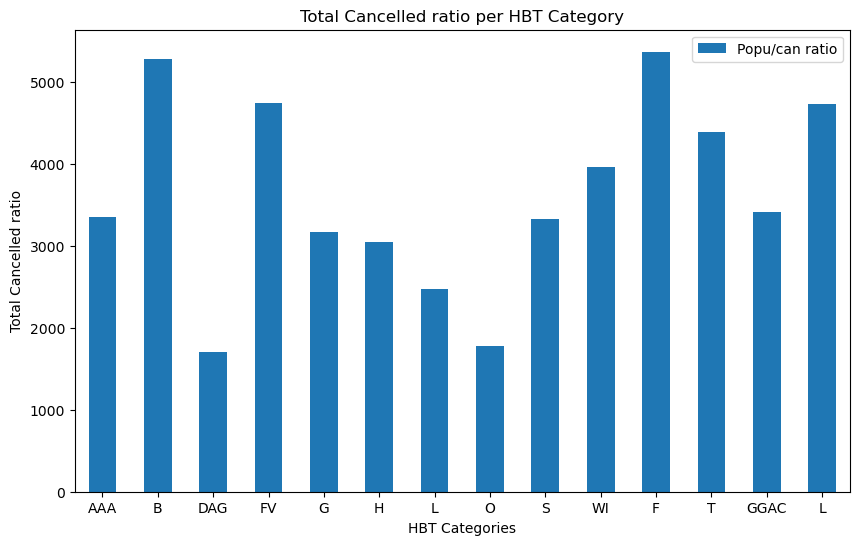

In [149]:
merged_namessum.plot(x = "Initials", y = "Popu/can ratio",kind = "bar", figsize = (10,6))

# Adding title and labels
plt.title('Total Cancelled ratio per HBT Category')
plt.xlabel('HBT Categories')
plt.ylabel('Total Cancelled ratio')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=0)

# Showing the plot
plt.show()

#shows Lanarkshire has the highest amount of cancellations